In [60]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes, load_breast_cancer, load_wine, load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import (
    mean_squared_error, 
    r2_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix
)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Linear Regression

In [12]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(442, 10) (442,)
(353, 10) (89, 10) (353,) (89,)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 score:", r2)

MSE: 2900.193628493483
R2 score: 0.45260276297191915


## Logistic Regression

In [13]:

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(569, 30) (569,)
(455, 30) (114, 30) (455,) (114,)


In [14]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 score: 0.9655172413793104


## Decision Tree

In [42]:
wine = load_wine()
X, y = wine.data, wine.target
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(178, 13) (178,)
(142, 13) (36, 13) (142,) (36,)


In [43]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

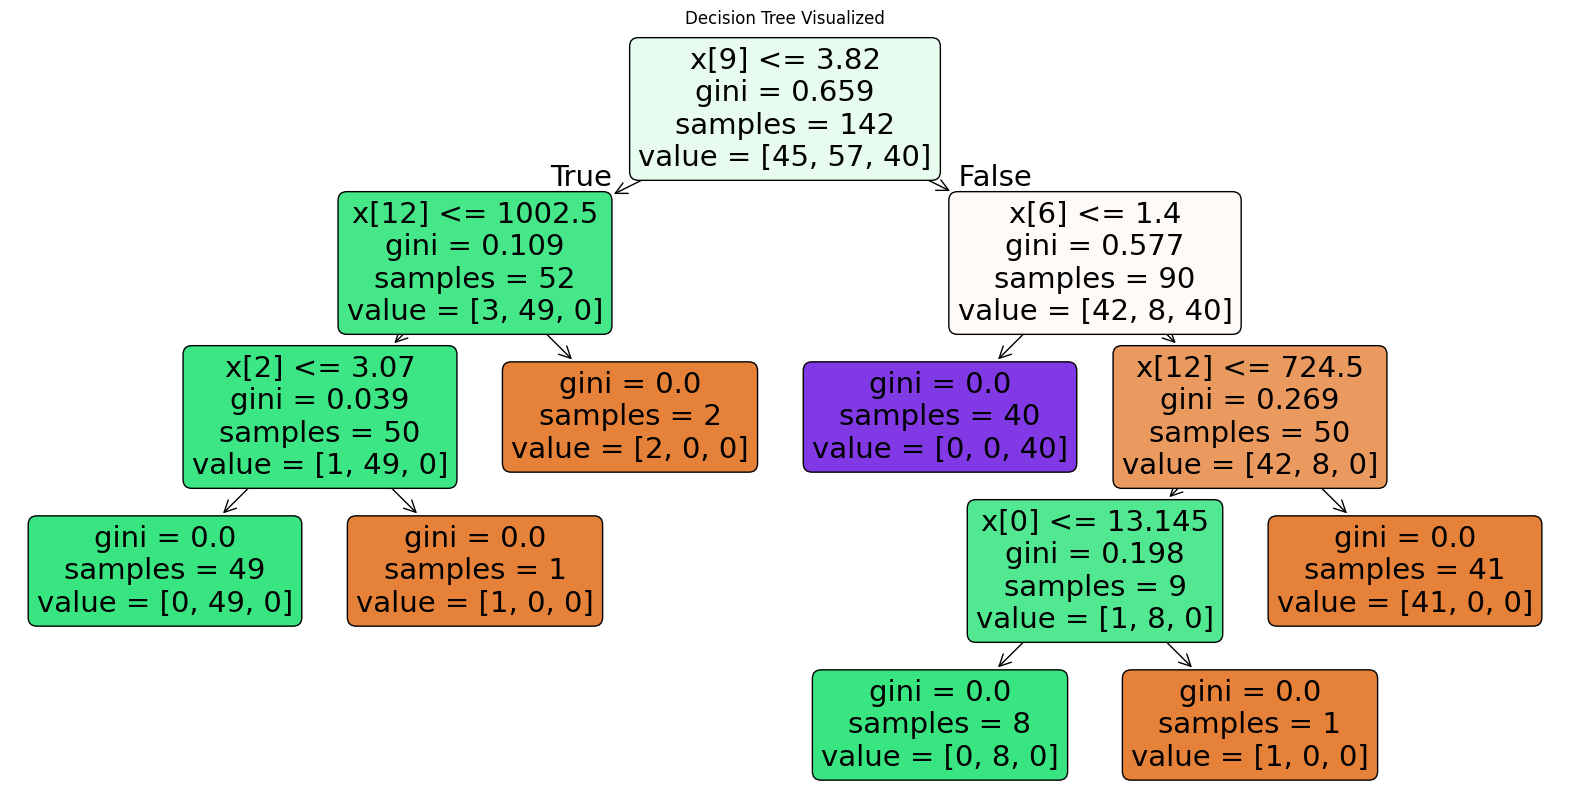

In [44]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, rounded=True)
plt.title("Decision Tree Visualized")
plt.show()

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9444444444444444
Precision: 0.953968253968254
Recall: 0.9345238095238096
F1 score: 0.9424740010946907


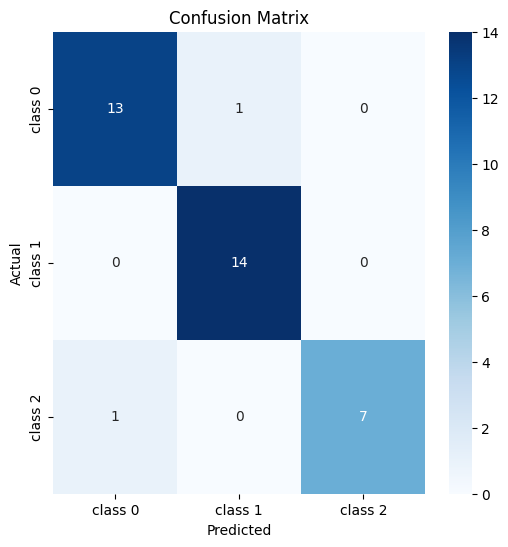

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(conf_matrix: np.ndarray) -> None:

    tick_labels = []
    for i in range(conf_matrix.shape[0]):
        tick_labels.append(f"class {i}")

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='d', 
                cmap='Blues', 
                xticklabels=tick_labels, 
                yticklabels=tick_labels
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(conf_matrix)

## Naive Bayes

In [48]:
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1797, 64) (1797,)
(1437, 64) (360, 64) (1437,) (360,)


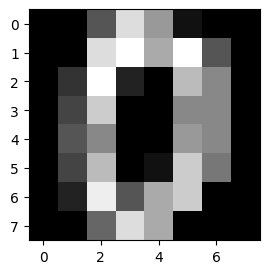

In [49]:
plt.figure(figsize=(3, 3))
plt.imshow(X[0].reshape(8,8), cmap='gray')

In [50]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

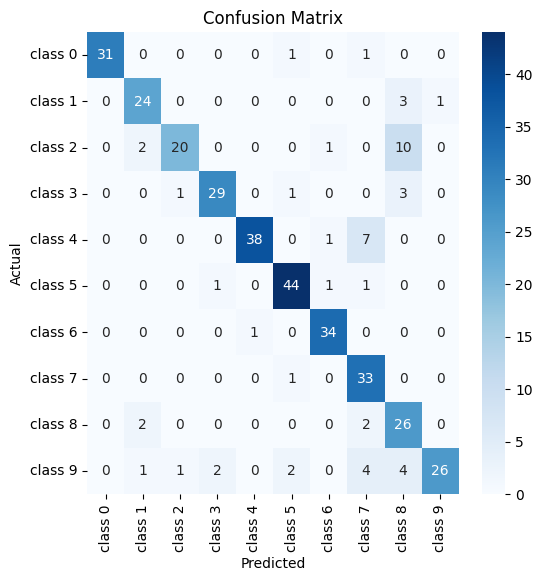

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8472222222222222
Precision: 0.8649844547206135
Recall: 0.8476479221745045
F1 score: 0.8437352605469787


## Nearest Neighbors

In [61]:
wine = load_wine()
X, y = wine.data, wine.target
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(178, 13) (178,)
(142, 13) (36, 13) (142,) (36,)


In [62]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='macro')
recall_knn = recall_score(y_test, y_pred, average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.8055555555555556
Precision: 0.7912698412698412
Recall: 0.7976190476190476
F1 Score: 0.78998778998779


In [ ]:
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

In [ ]:
# Plot decision boundaries
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(weights=weights).fit(X_train_2D, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test_2D,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Principal Component 1",
        ylabel="Principal Component 2",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        wine.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(f"3-Class classification\n(weights={weights!r})")

plt.show()